<a href="https://colab.research.google.com/github/AMRITAA-M/PRODIGY_DS_01/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ****IMPORTING PANDAS****
---
Pandas is a powerful Python library used for data manipulation & analysis.
It provides easy-to-use data structures like DataFrames and Series.

---





In [56]:
import pandas as pd

# **UPLOADING CSV FILE - DATASET**


---




In [57]:
from google.colab import files
uploaded = files.upload()

# **LOADING THE DATASET**

---



In [59]:
# Load Dataset
file_path = 'twitter_training.csv'  # Path to your uploaded dataset
df = pd.read_csv(file_path, header=None)  # Load CSV file without headers
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       74682 non-null  int64 
 1   1       74682 non-null  object
 2   2       74682 non-null  object
 3   3       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# **ASSIGN CORRECT COLUMN NAMES FOR THE GIVEN COLUMNS**

---



In [60]:
# Assign correct column names (since we have 4 columns)
df.columns = ['tweet_id', 'category', 'sentiment', 'text']

# Display the first few rows
df.head()

,tweet_id,category,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# **DATA PREPROCESSING**

---

Raw text is cleaned to remove irrelevant content (URLs, special characters, stopwords, etc.) and normalize the text for easier analysis.

---



In [61]:
import re

# Function to clean text
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+|#", "", text)  # Remove mentions and hashtags
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = " ".join(text.split())  # Remove extra spaces
    return text

# Apply cleaning function to 'text' column
df["cleaned_text"] = df["text"].apply(preprocess_text)

# Display cleaned text
df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder yo...


In [37]:
df.head()

,category,tweet_id,sentiment,text,cleaned_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder yo...


# **SENTIMENT ANALYSIS**

---
Once the text is cleaned and preprocessed, you can apply sentiment analysis to classify each piece of text into categories such as Positive, Negative, or Neutral.


---



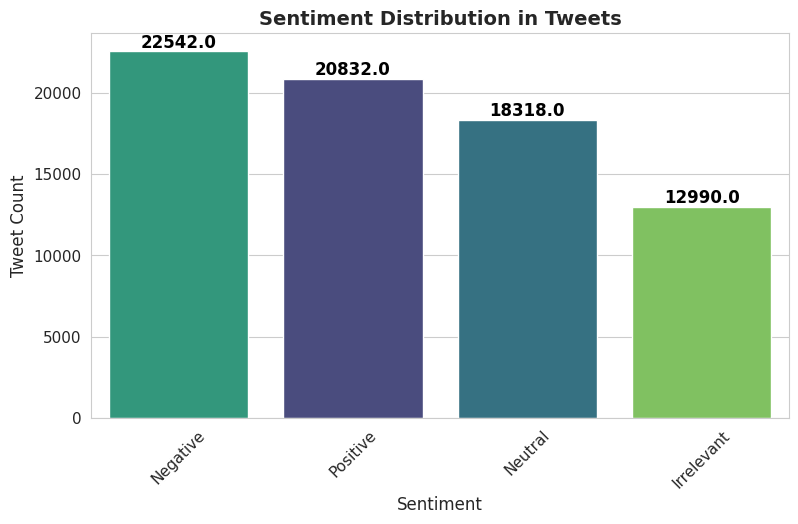

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for better aesthetics
sns.set_style("whitegrid")

# Plot sentiment distribution with explicit hue
plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df, x='sentiment', hue='sentiment', palette='viridis',
                   order=df['sentiment'].value_counts().index, legend=False)

# Add labels to bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Improve title and labels
plt.title('Sentiment Distribution in Tweets', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Tweet Count', fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.show()


# **DATA VISUALIZATION**

---
Visualizing the sentiment analysis results is essential for gaining insights.

**Word Cloud:** Displays the most frequent words in positive or negative posts,
giving insight into the key aspects discussed.

---




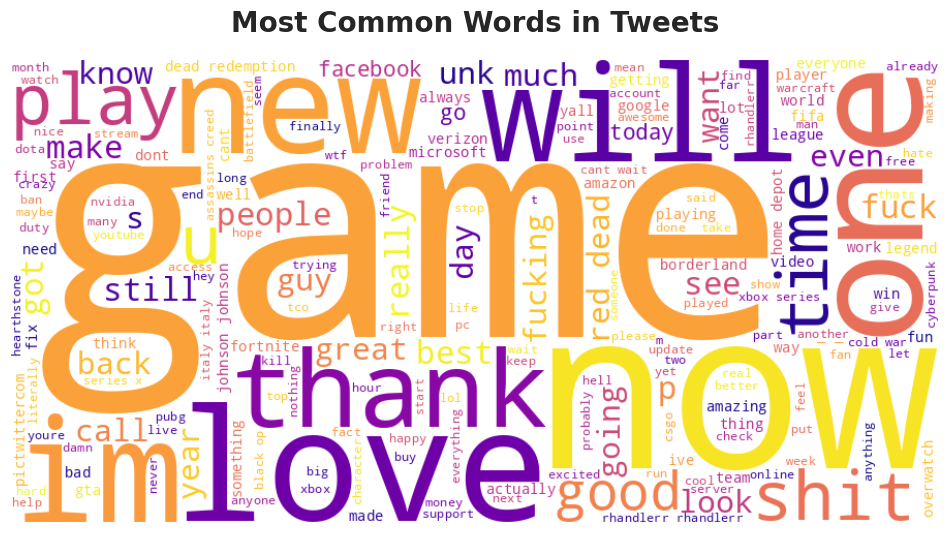

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tweets into a single text
all_words = " ".join(df["cleaned_text"])

# Generate word cloud
wordcloud = WordCloud(width=900, height=450, background_color="white", colormap="plasma",
                      max_words=200, contour_color="black", contour_width=2).generate(all_words)

# Plot word cloud with better spacing
plt.figure(figsize=(12,7))  # Increased figure height
plt.subplots_adjust(top=0.85)  # Adds space between title and word cloud
plt.title("Most Common Words in Tweets", fontsize=20, fontweight="bold", pad=20)  # Increased padding
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes for a clean look
plt.show()


# **WORD CLOUD REPRESENTING**

---



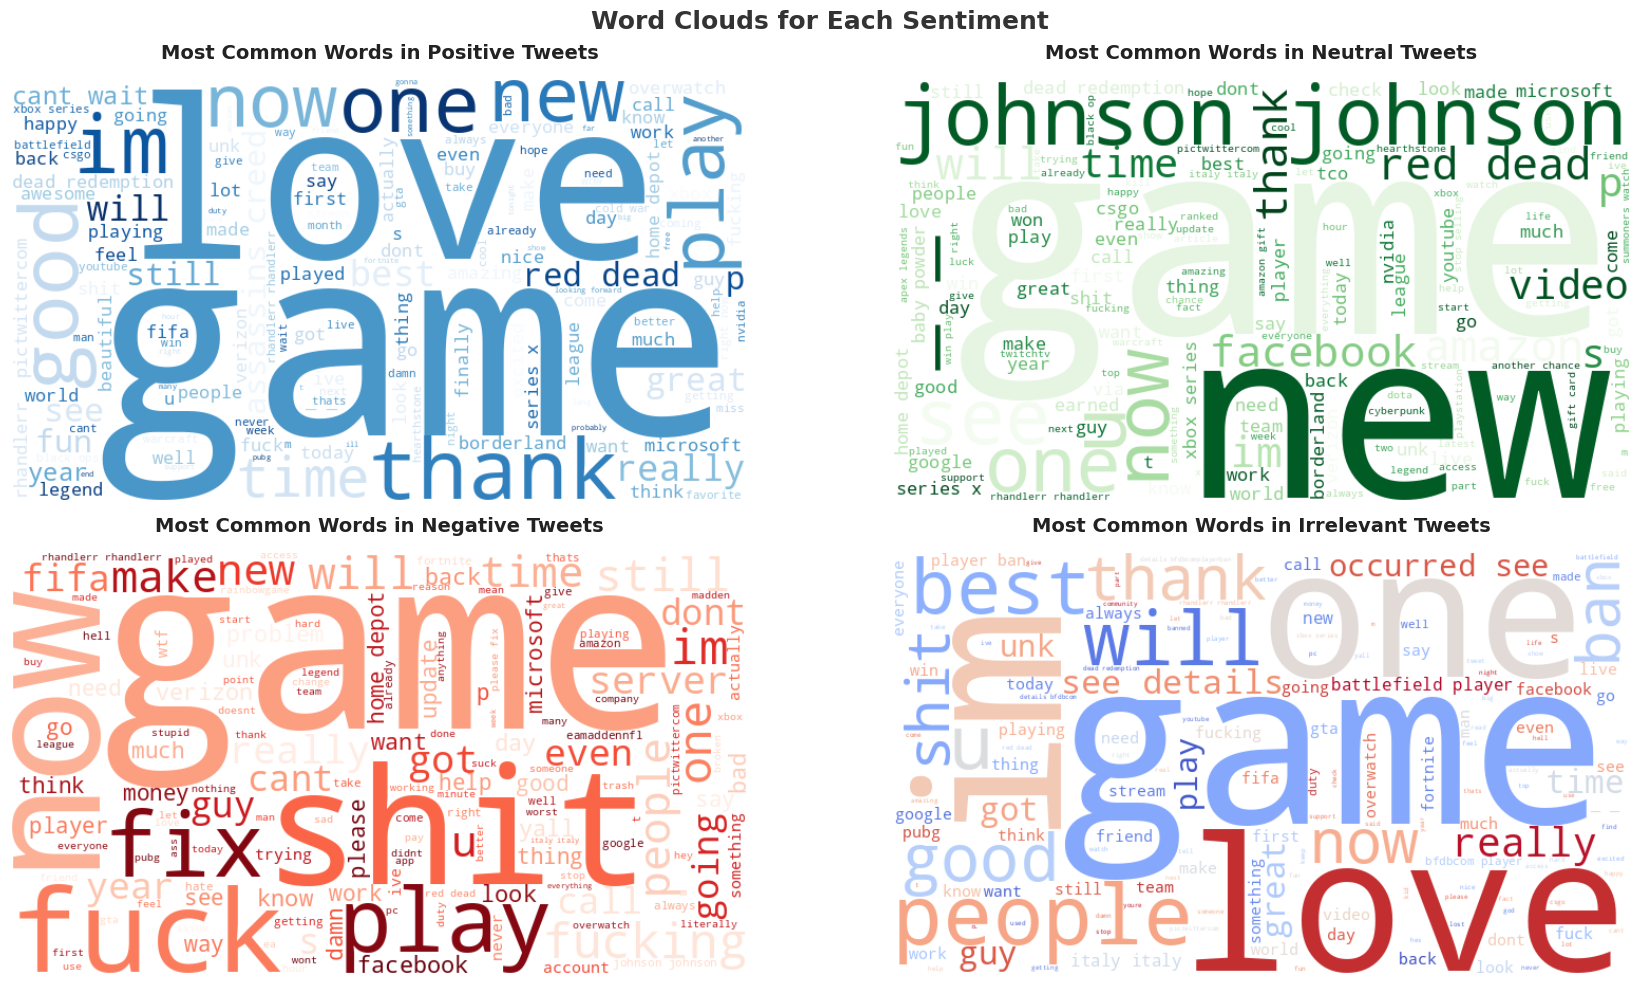

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define colors for each sentiment
sentiment_colors = {
    "positive": "Blues",
    "negative": "Reds",
    "neutral": "Greens",
    "mixed": "Purples"
}

# Get unique sentiments
sentiments = df['sentiment'].unique()

# Set up figure dynamically based on sentiment count
plt.figure(figsize=(18, 10))
plt.suptitle("Word Clouds for Each Sentiment", fontsize=18, fontweight="bold", color="#333", y=0.98)

# Generate and plot word clouds for each sentiment
for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(2, (len(sentiments) + 1) // 2, i)  # Adjust grid dynamically
    text = " ".join(df[df['sentiment'] == sentiment]['cleaned_text'])

    wordcloud = WordCloud(width=700, height=400, background_color='white',
                          colormap=sentiment_colors.get(sentiment.lower(), "coolwarm"),
                          max_words=150, contour_color="black", contour_width=3).generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Most Common Words in {sentiment.capitalize()} Tweets",
              fontsize=14, fontweight="bold", color="#222", pad=15)
    plt.axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# **TEXT ANALYSIS**

---



Generating graph for sentiment: positive


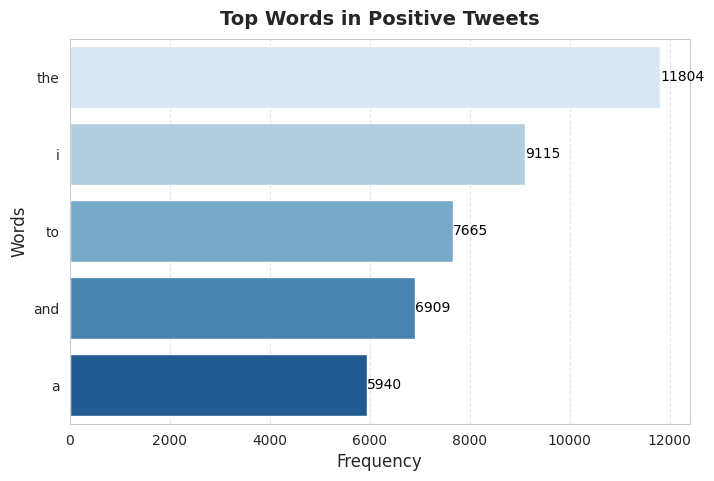

Generating graph for sentiment: neutral


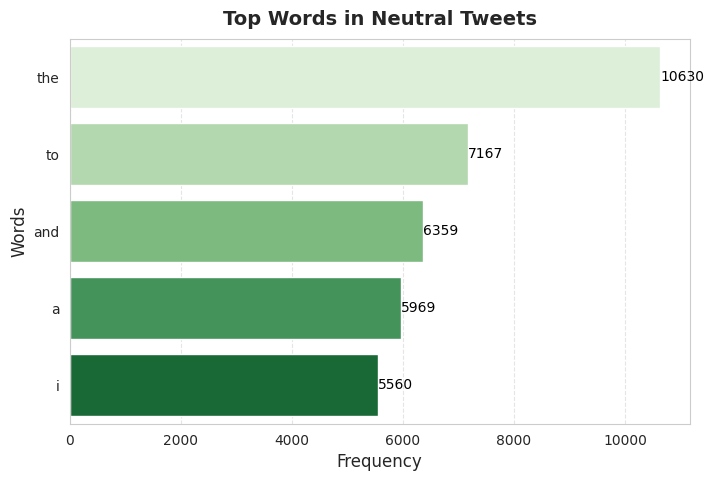

Generating graph for sentiment: negative


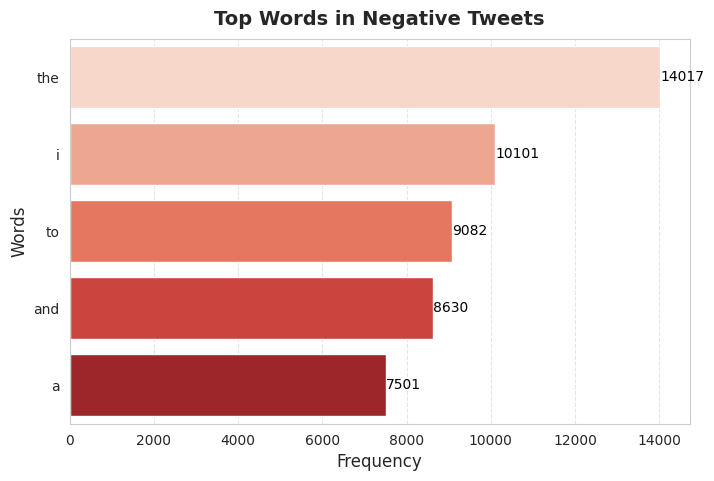

Generating graph for sentiment: irrelevant


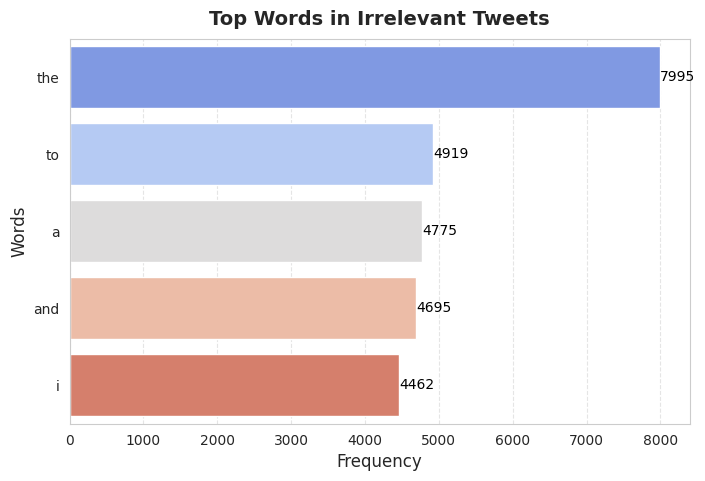

In [65]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize sentiment names (in case of extra spaces or capitalization issues)
df["sentiment"] = df["sentiment"].str.strip().str.lower()

# Function to get top words per sentiment
def get_top_words(df, sentiment, num_words=5):  # Reduced to 5 words if needed
    words = " ".join(df[df["sentiment"] == sentiment]["cleaned_text"]).split()
    word_counts = Counter(words)

    if len(word_counts) == 0:  # Avoid plotting empty categories
        print(f"Skipping {sentiment} - Not enough words")
        return pd.DataFrame(columns=["Word", "Count"])

    return pd.DataFrame(word_counts.most_common(num_words), columns=["Word", "Count"])

# Define color mapping
sentiment_colors = {
    "positive": "Blues",
    "negative": "Reds",
    "neutral": "Greens",
    "mixed": "Purples"
}

# Generate separate plots for each sentiment
for sentiment in df["sentiment"].unique():
    print(f"Generating graph for sentiment: {sentiment}")  # Debugging

    top_words = get_top_words(df, sentiment)
    if top_words.empty:
        continue  # Skip if no words available

    plt.figure(figsize=(8, 5))

    # ✅ FIXED: Assign `hue=y_variable` to remove the warning
    sns.barplot(y=top_words["Word"], x=top_words["Count"], hue=top_words["Word"],
                palette=sentiment_colors.get(sentiment.lower(), "coolwarm"),
                dodge=False, legend=False)

    # Add word count labels
    for index, value in enumerate(top_words["Count"]):
        plt.text(value + 0.5, index, str(value), va="center", fontsize=10, color="black")

    plt.title(f"Top Words in {sentiment.capitalize()} Tweets", fontsize=14, fontweight="bold", pad=10)
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel("Words", fontsize=12)
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.show()


# **AGGREGATION AND GROUPING**

---
Once sentiment labels have been assigned, the next step is to aggregate and group the data based on different dimensions like time, category, or topic. This helps uncover trends or patterns.

**Sentiment by Category**: If posts are categorized (e.g., topics, brands), you can group sentiment by category to identify which topics are being discussed positively or negatively.

---




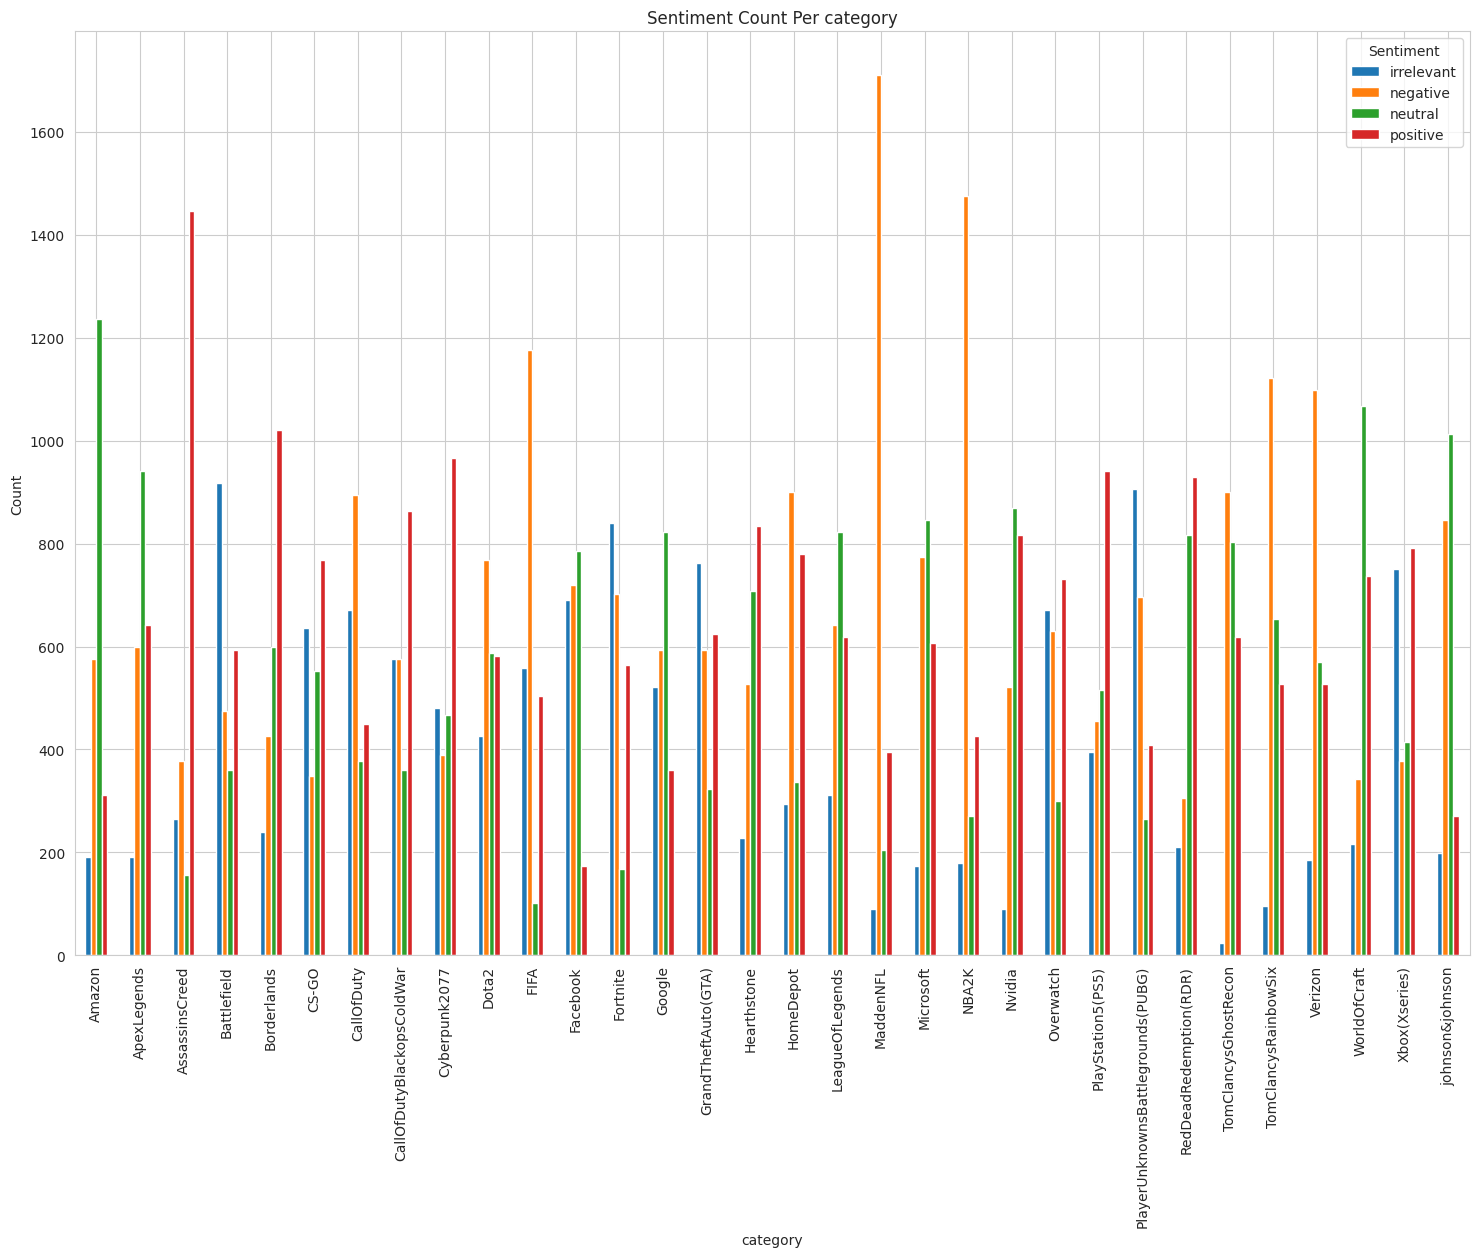

In [78]:
import matplotlib.pyplot as plt

# Group by category and sentiment
entity_sentiment_counts = df.groupby(['category', 'sentiment']).size().unstack()

# Plot as a bar chart
entity_sentiment_counts.plot(kind='bar', figsize=(18,12))
plt.title('Sentiment Count Per category')
plt.xlabel('category')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate category names for readability
plt.legend(title="Sentiment")
plt.show()

# **CONCLUSION**

---


Analyzing sentiment patterns in social media helps us understand public opinion on specific topics or brands. By tracking how positive, negative, or neutral sentiments change over time, we can identify trends, reactions to events, and overall public perception. Visualizing this data with charts and graphs makes it easier to interpret, enabling businesses or researchers to make informed decisions and adjust strategies based on how people feel.

---

